# Model 1

In [1]:
# Importing Necessary Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

In [2]:
# Importing data and getting the shape of the data frame
df_players = pd.read_excel('Football_Players.xlsx')
df_players.shape

(43, 9)

In [3]:
# Getting the basic info of the frame
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  43 non-null     int64  
 1   Comp    43 non-null     int64  
 2   Att     43 non-null     int64  
 3   Pct     43 non-null     float64
 4   Yds     43 non-null     int64  
 5   Avg     43 non-null     float64
 6   Yds/G   43 non-null     float64
 7   TD      43 non-null     int64  
 8   Int     43 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 3.1 KB


In [4]:
# Checking for null values
df_players.isnull().sum()

Player    0
Comp      0
Att       0
Pct       0
Yds       0
Avg       0
Yds/G     0
TD        0
Int       0
dtype: int64

In [5]:
# Standardizing the required columns for better clustering
scaler = StandardScaler()
scaled_players_df = scaler.fit_transform(df_players[['Comp','Att','Pct','Yds','Avg','Yds/G','TD','Int']])

In [6]:
# Applying the KMeans clustering with number of cluster (K) = 3
clusters = KMeans(3)
clusters.fit(scaled_players_df)
clusters.cluster_centers_
counter = Counter(clusters.labels_)
largest_cluster_idx = np.argmax(counter.values())
largest_cluster_center = clusters.cluster_centers_[largest_cluster_idx]

Text(0, 0.5, 'Error')

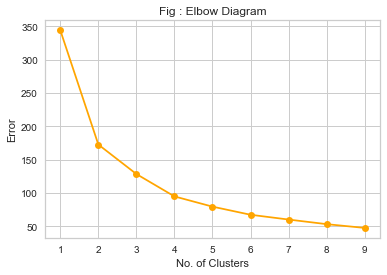

In [7]:
# Implementing the Elbow Method to find optimal number of clusters

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_players_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o", color = 'orange');
plt.title( "Fig : Elbow Diagram");
plt.xlabel('No. of Clusters')
plt.ylabel('Error')

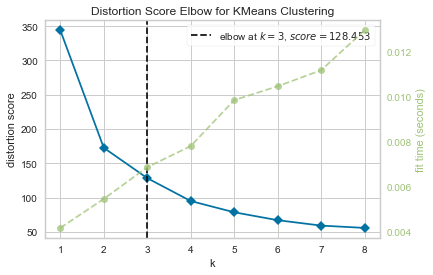

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Using yello brick module to find the optimum number of clusters

visualizer = KElbowVisualizer(clusters, k = (1,9))

visualizer.fit(scaled_players_df)       
visualizer.show()

In [9]:
# Re-fitting the clusters with optimal number of clusters viz 3
k = 3
clusters = KMeans(k, random_state = 42)
clusters.fit( scaled_players_df )
df_players["clusterid"] = clusters.labels_

In [10]:
# Getting the number of points in every clusters and finding the center of the largest cluster
counter = Counter(clusters.labels_)
largest_cluster_idx = np.argmax(counter.values())
largest_cluster_center = clusters.cluster_centers_[largest_cluster_idx]

In [11]:
# Displaying the clusters with the number of points they have
counter

Counter({0: 15, 1: 14, 2: 14})

In [12]:
# Printing the center of the cluster with maximum data points
largest_cluster_center

array([-1.23051139, -1.24947776, -0.58828214, -1.18767986, -0.38019118,
       -0.52218946, -1.03531842, -0.91686249])

# Model 2

In [13]:
# Importing Necessary Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
%matplotlib inline

In [14]:
# Importing data and getting the 7 point statistics of the data frame
df_hp = pd.read_excel('Health_Population.xlsx')
df_hp.shape
df_hp.describe()

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,3.800000e+01,3.800000e+01,38.000000,38.000000,38.000000
mean,8.481368,1231.432553,72.562035,177.039605,112.392658,1.069924,50.310477,49.689523,1.045051e+08,4.963038e+07,2.394368,18.100789,15987.368421
std,2.659986,1266.611489,8.277580,94.000970,87.394427,1.194567,1.683159,1.683159,2.590919e+08,1.329950e+08,1.335579,9.391543,14199.335288
min,2.527000,5.368287,50.002878,87.190000,47.577000,-2.850973,41.557463,48.141618,4.363000e+05,1.887430e+05,1.260000,9.300000,120.000000
25%,6.523750,161.191337,70.627756,107.058250,61.744500,0.408464,50.118738,48.872748,7.391079e+06,3.923451e+06,1.510000,11.125000,2507.500000
50%,8.696000,684.351897,76.075000,143.816500,71.956000,1.111822,50.564663,49.435337,3.391358e+07,1.601940e+07,1.870000,13.865000,13110.000000
75%,10.100000,2181.893161,78.082927,201.981250,114.106500,1.510575,51.127252,49.881262,6.265822e+07,2.861630e+07,2.800750,23.782250,26367.500000
max,15.955000,4788.311560,81.076098,493.454000,374.819000,4.675478,51.858382,58.442537,1.262645e+09,7.348526e+08,6.751000,45.964000,46590.000000


In [15]:
# Getting the basic info of the frame
df_hp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       38 non-null     object 
 1   Death Rate         38 non-null     float64
 2   Health Expend      38 non-null     float64
 3   Life Exp           38 non-null     float64
 4   Male Mortality     38 non-null     float64
 5   Female Mortality   38 non-null     float64
 6   Population Growth  38 non-null     float64
 7   Female Pop         38 non-null     float64
 8   Male Pop           38 non-null     float64
 9   Total Pop          38 non-null     int64  
 10  Labor Force        38 non-null     int64  
 11  Fertility Rate     38 non-null     float64
 12  Birth Rate         38 non-null     float64
 13  GNI                38 non-null     int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 4.3+ KB


In [16]:
# Checking for null values
df_hp.isnull().sum()

Country Name         0
Death Rate           0
Health Expend        0
Life Exp             0
Male Mortality       0
Female Mortality     0
Population Growth    0
Female Pop           0
Male Pop             0
Total Pop            0
Labor Force          0
Fertility Rate       0
Birth Rate           0
GNI                  0
dtype: int64

In [17]:
df_hp

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI
0,Argentina,7.796,706.904994,73.755805,180.641,92.799,1.110875,51.072396,48.927604,37057452,16458321,2.561,19.413,7440
1,Austria,9.600,2415.782386,78.126829,126.288,63.086,0.240467,51.465237,48.534763,8011566,3899156,1.360,9.800,26790
2,Australia,6.700,1745.925306,79.234146,97.967,56.110,1.192272,50.112224,49.887776,19153000,9603052,1.756,13.000,21130
3,Brazil,5.994,262.758717,70.016390,247.531,125.460,1.452901,50.582216,49.417784,175287587,79593872,2.300,20.204,3860
4,Cambodia,9.426,17.630712,58.350878,292.208,226.730,2.236057,51.399769,48.600231,12152354,5579215,3.805,28.058,300
5,Canada,7.100,2099.841455,79.236585,100.968,61.077,0.882999,50.464688,49.535312,30769700,16235329,1.490,10.900,22610
6,China,6.450,43.626109,71.995585,123.629,91.798,0.787957,48.643896,51.356104,1262645000,734852598,1.497,14.030,940
7,Colombia,5.644,146.006666,70.988707,230.093,111.186,1.457656,50.547110,49.452890,40403958,16763699,2.389,20.959,2320
8,"Congo, Dem. Rep.",15.955,18.159123,50.002878,370.806,317.698,2.533546,50.411344,49.588656,47076387,18517555,6.751,45.964,130
9,Croatia,11.200,371.224400,72.807805,174.609,70.950,-2.850973,51.858382,48.141618,4426000,1963073,1.390,9.800,5290


### Normalization is required as the features have different units in which they are measured and the variable Health Expend will skew the data with its varibale and high magnitude (High Standard Deviation)

In [18]:
# Standardizing the required columns for better clustering
scaler = StandardScaler()
scaled_hp_df = scaler.fit_transform(df_hp[['Death Rate','Health Expend','Life Exp','Male Mortality','Female Mortality']])

In [19]:
# Applying the KMeans clustering with number of cluster (K) = 3
k = 4
clusters = KMeans(k, random_state = 42)
clusters.fit( scaled_hp_df )
df_hp["clusterid"] = clusters.labels_

In [20]:
# Taking the count of data points in each cluster
counter = Counter(clusters.labels_)

In [21]:
# Displaying the data points in each cluster
counter

Counter({2: 14, 1: 17, 0: 4, 3: 3})

In [22]:
# Filtering cluster with id = 1 as it is the largest cluster and calculating the mean
df_largest_cluster = df_hp[df_hp.clusterid == 1]
df_largest_cluster['GNI'].mean()

29296.470588235294

# Model 3

In [23]:
# Importing Necessary Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [24]:
# Importing Data
df_paper = pd.read_excel('Sanjay.xlsx')
df_paper.describe()

,25 or Over,Less than HS,HS,SC,Bachelor,Income
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,22961.727273,4732.792208,5487.935065,5336.662338,7404.337662,45823.064935
std,15420.572590,4222.842748,3711.589333,3338.953317,10155.544093,17571.879139
min,1923.000000,407.000000,564.000000,554.000000,151.000000,13380.000000
25%,11908.000000,1712.000000,2728.000000,2755.000000,1547.000000,32553.000000
50%,19210.000000,3638.000000,4807.000000,4383.000000,3975.000000,42418.000000
75%,31106.000000,6267.000000,7645.000000,7955.000000,7857.000000,55669.000000
max,73883.000000,23697.000000,21123.000000,18011.000000,56014.000000,87394.000000




### As we can see from the describe method the standard deviation of the variables is too high and and can skew the clustering hence, standardization is required

In [25]:
# Checking for null values
df_paper.isnull().sum()

Community Area    0
25 or Over        0
Less than HS      0
HS                0
SC                0
Bachelor          0
Income            0
dtype: int64

In [26]:
scaler = StandardScaler()
scaled_paper_df = scaler.fit_transform(df_paper[['Less than HS','HS','SC','Bachelor']])

Text(0, 0.5, 'Error')

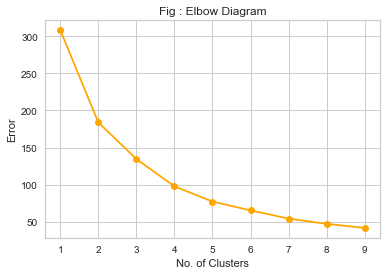

In [27]:
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_paper_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o", color = 'orange');
plt.title( "Fig : Elbow Diagram");
plt.xlabel('No. of Clusters')
plt.ylabel('Error')

In [28]:
# Using the optimal number of clusters i.e. 3
h_clusters = AgglomerativeClustering(4)
#df_paper_features = df_paper.iloc[:,[1,2,3,4,5,]]
h_clusters.fit(scaled_paper_df)
df_paper['h_clusterid'] = h_clusters.labels_

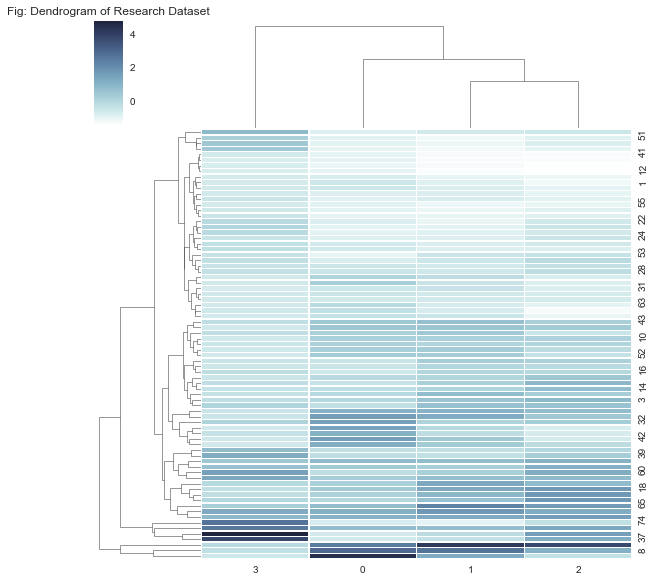

In [29]:
# Displaying the dendogram
cmap = sns.cubehelix_palette(as_cmap = True, rot = -.2, light = 1)
sns.clustermap(scaled_paper_df, cmap = cmap, linewidths = .2,
figsize = (8,8));
plt.title( "Fig: Dendrogram of Research Dataset");

In [30]:
# Detecting the largest cluster
df_paper.groupby([df_paper.h_clusterid]).size()

h_clusterid
0    13
1    27
2     3
3    34
dtype: int64

In [31]:
# Printing the Income of the largest cluster 
df_mean = df_paper[df_paper.h_clusterid == 3]
df_mean['Income'].mean()

46295.58823529412

# Model 4

In [32]:
# Importing Necessary Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib inline

In [33]:
# Importing the data
df_covid = pd.read_csv('covid19.csv')
df_covid

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,26-05-2020 02:32,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,26-05-2020 02:32,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,26-05-2020 02:32,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,26-05-2020 02:32,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,26-05-2020 02:32,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3405,NaN,NaN,NaN,West Bank and Gaza,26-05-2020 02:32,31.952200,35.233200,423,3,357,63,West Bank and Gaza
3406,NaN,NaN,NaN,Western Sahara,26-05-2020 02:32,24.215500,-12.885800,9,0,6,3,Western Sahara
3407,NaN,NaN,NaN,Yemen,26-05-2020 02:32,15.552727,48.516388,233,44,10,179,Yemen
3408,NaN,NaN,NaN,Zambia,26-05-2020 02:32,-13.133897,27.849332,920,7,336,577,Zambia


In [34]:
df_covid.isnull().sum()

FIPS              404
Admin2            401
Province_State    178
Country_Region      0
Last_Update         0
Lat                69
Long_              69
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64

In [35]:
df_covid_cleaned = df_covid.dropna(subset = ['Admin2','Province_State','Confirmed','Deaths','Recovered'])

In [36]:
df_covid_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 3008
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3000 non-null   float64
 1   Admin2          3009 non-null   object 
 2   Province_State  3009 non-null   object 
 3   Country_Region  3009 non-null   object 
 4   Last_Update     3009 non-null   object 
 5   Lat             2951 non-null   float64
 6   Long_           2951 non-null   float64
 7   Confirmed       3009 non-null   int64  
 8   Deaths          3009 non-null   int64  
 9   Recovered       3009 non-null   int64  
 10  Active          3009 non-null   int64  
 11  Combined_Key    3009 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 305.6+ KB


In [37]:
scaled_covid_df = scaler.fit_transform(df_covid_cleaned[['Confirmed','Deaths','Recovered']])

Text(0, 0.5, 'Error')

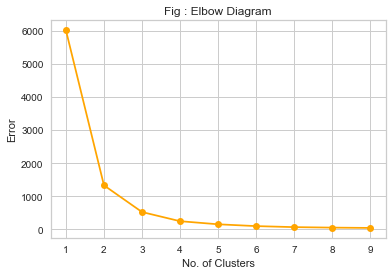

In [38]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_covid_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o", color = 'orange');
plt.title( "Fig : Elbow Diagram");
plt.xlabel('No. of Clusters')
plt.ylabel('Error')

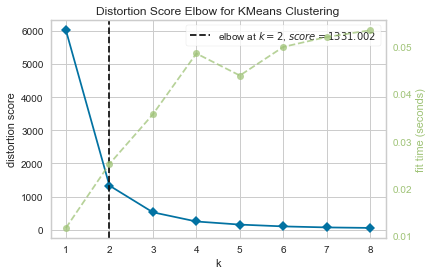

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
visualizer = KElbowVisualizer(clusters, k = (1,9))
visualizer.fit(scaled_covid_df)       
visualizer.show()

In [40]:
df_covid_cleaned['clusterid'] = clusters.labels_

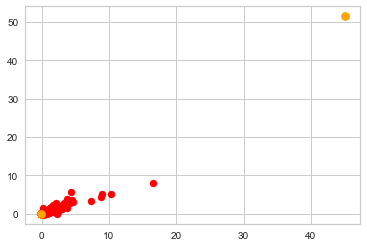

In [41]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_covid_df)
plt.scatter(scaled_covid_df[y_kmeans == 0, 0], scaled_covid_df[y_kmeans == 0, 1], s = 50, c='red', label='Target')
plt.scatter(scaled_covid_df[y_kmeans == 1, 0], scaled_covid_df[y_kmeans == 1, 1], s = 50, c ='blue', label='Target')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 70, c = 'orange', label = 'Centroids')

In [42]:
df_covid_cleaned[df_covid_cleaned.clusterid == 1]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,clusterid
1939,36061.0,New York City,New York,US,26-05-2020 02:32,40.767273,-73.971526,198731,21259,0,177472,"New York City, New York, US",1


### We can see from the graph that there is an outlier in the data which is the New York City
### The remaining states in US exihibits similar characteristics and hence, they are clustered together